# Clase 4 - Propagación hacia atrás y métodos de optimización

## Configuración de entorno

In [52]:
import os
import pandas as pd
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
print(plt.style.available)
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Propagación hacia adelante en Deep Learning

Propagación hacia adelante

La propagación hacia adelante, conocida como *forward propagation*, es el proceso mediante el cual una red neuronal toma un conjunto de entradas, las transforma a través de las capas intermedias utilizando pesos, sesgos y funciones de activación, y genera una salida. Este cálculo es esencial para obtener las predicciones de la red, que luego se comparan con los valores reales para evaluar la pérdida.

Flujo de la propagación hacia adelante

1. Entrada a la red:
   - Los datos de entrada $X$ se introducen en la red a través de la capa inicial. Por ejemplo, en problemas de clasificación, las entradas son las características del dataset.

   $ X = \text{vector o matriz de entrada} $

2. Transformaciones en cada capa:
   - En cada capa, se realiza una transformación lineal seguida de una función de activación. La transformación en una capa $l$ se expresa como:

     $ Z^{(l)} = W^{(l)} \cdot A^{(l-1)} + b^{(l)} $

     $ A^{(l)} = f(Z^{(l)}) $

     Donde:
     - $ W^{(l)} $ son los pesos de la capa $ l $.
     - $ A^{(l-1)} $ es la salida de la capa anterior o la entrada $X$ para la primera capa.
     - $ b^{(l)} $ es el sesgo de la capa $ l $.
     - $ f $ es la función de activación, como ReLU, Sigmoid o Tanh.

3. Propagación a través de las capas:
   - Este cálculo se repite para todas las capas de la red, desde la capa inicial hasta la capa final.

4. Capa de salida:
   - Dependiendo del tipo de tarea:
     - Para regresión: la salida puede ser el valor de $ Z $ directamente.
     - Para clasificación binaria: se aplica Sigmoid para obtener probabilidades.
     - Para clasificación multiclase: se aplica Softmax.

     $ \hat{y} = g(Z^{(L)}) $

     Donde $ g $ es la función de activación de la capa de salida y $ L $ es la última capa.

5. Cálculo de la pérdida:
   - La salida de la red $ \hat{y} $ se compara con los valores reales $ y_{\text{true}} $ utilizando una función de pérdida, como:
     - Error cuadrático medio (MSE):

       $ \mathcal{L} = \frac{1}{N} \sum (y_{\text{pred}} - y_{\text{true}})^2 $

     - Entropía cruzada:

       $ \mathcal{L} = - \frac{1}{N} \sum y_{\text{true}} \cdot \log(y_{\text{pred}}) $

Ejemplo práctico

Red neuronal simple con una capa oculta:

1. Cálculos:
   - Capa oculta:
     
     $ Z_{\text{hidden}} = W_1 \cdot X + b_1 $

     $ A_{\text{hidden}} = \text{ReLU}(Z_{\text{hidden}}) $

   - Capa de salida:
     
     $ Z_{\text{output}} = W_{\text{out}} \cdot A_{\text{hidden}} + b_{\text{out}} $

     $ A_{\text{output}} = \text{función de activación de salida}(Z_{\text{output}}) $

In [53]:
# Datos de entrada
X = np.array([[0.5, 0.8]])  # Una muestra con dos características

# Parámetros iniciales
W1 = np.random.randn(2, 3)  # Pesos de la capa oculta (2 entradas, 3 neuronas ocultas)
b1 = np.zeros((1, 3))       # Sesgos de la capa oculta
W2 = np.random.randn(3, 1)  # Pesos de la capa de salida (3 entradas, 1 salida)
b2 = np.zeros((1, 1))       # Sesgo de la capa de salida

# Forward Pass
# Capa oculta
Z1 = np.dot(X, W1) + b1
A1 = np.maximum(0, Z1)  # ReLU

# Capa de salida
Z2 = np.dot(A1, W2) + b2
A2 = Z2  # Sin activación de salida (regresión)

print(f"Predicción: {A2}")


Predicción: [[0.04454542]]


## Propagación hacia atrás en Deep Learning

#### Conceptos



La propagación hacia atrás, conocida como backpropagation, es el algoritmo que permite entrenar redes neuronales en deep learning. Es la técnica utilizada para minimizar la función de pérdida ajustando los pesos y sesgos de la red mediante el cálculo de gradientes usando el método de la cadena.

Conceptos clave

- Función de pérdida: Mide la discrepancia entre las predicciones de la red y las etiquetas reales. Ejemplos comunes son el error cuadrático medio (MSE) y la entropía cruzada.
- Gradiente: Indica la dirección y magnitud del cambio necesario para reducir la pérdida.
- Optimización: Algoritmos como SGD, Adam o RMSProp se utilizan para ajustar los parámetros de la red.

Fases del algoritmo de backpropagation

1. Forward Pass (Propagación hacia adelante)

El objetivo es calcular la salida de la red neuronal dado un conjunto de entradas.

Flujo:
- Los datos de entrada $x$ atraviesan la red desde la capa inicial hasta la capa de salida.
- Cada neurona en la primera capa recibe un conjunto de valores $x_1, x_2, ..., x_n$.
- En cada capa, se aplica la fórmula $z = w \cdot x + b$, donde $w$ representa los pesos, $x$ las entradas y $b$ los sesgos.
- Se aplica una función de activación $a = f(z)$, como ReLU, Sigmoid o Tanh, para introducir no linealidad.
- El valor resultante $a$ se propaga como entrada a la siguiente capa.
- En la última capa, se obtienen las predicciones $y_{\text{pred}}$, que se comparan con las etiquetas reales $y_{\text{true}}$ mediante una función de pérdida $\mathcal{L} = \text{Loss}(y_{\text{pred}}, y_{\text{true}})$.

Interacciones:
- Las neuronas toman entradas de las neuronas previas y ajustan sus salidas mediante los pesos y sesgos.
- Las funciones de activación deciden si las señales se propagan o no.

2. Backward Pass (Propagación hacia atrás)

El objetivo es calcular los gradientes de la función de pérdida respecto a los pesos y sesgos.

Flujo:
- En la capa de salida, se calcula el error $\delta_{\text{output}} = \frac{\partial \mathcal{L}}{\partial a_{\text{output}}}$.
- Este error se retropropaga hacia las capas anteriores usando la regla de la cadena:
  
  $\delta^l = \delta^{l+1} \cdot \frac{\partial z^{l+1}}{\partial a^l} \cdot \frac{\partial a^l}{\partial z^l}$

  Donde $\delta^l$ es el error en la capa actual y las derivadas locales dependen de la función de activación.

- Con $\delta^l$, se calculan los gradientes para los pesos y sesgos:

  $\frac{\partial \mathcal{L}}{\partial w^l} = \delta^l \cdot (a^{l-1})^T$

  $\frac{\partial \mathcal{L}}{\partial b^l} = \delta^l$

Interacciones:
- Los errores de una capa se distribuyen hacia las capas previas usando los pesos.
- Las funciones de activación contribuyen al cálculo de los gradientes locales.

3. Actualización de pesos

El objetivo es ajustar los pesos y sesgos para reducir la pérdida.

Flujo:
- Con los gradientes calculados, los pesos se actualizan usando algoritmos como SGD:
  
  $w := w - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}$

  Donde $\eta$ es la tasa de aprendizaje.

- De manera similar, los sesgos se ajustan:

  $b := b - \eta \cdot \frac{\partial \mathcal{L}}{\partial b}$

Interacciones:
- Los gradientes determinan cómo deben cambiar los pesos y sesgos para reducir la pérdida.
- Los algoritmos de optimización pueden incluir técnicas adicionales, como momentum o ajuste adaptativo.

Ejemplo simplificado

Para una red con:
- Entrada $x$, peso $w$, salida $y = w \cdot x$.
- Función de pérdida $\mathcal{L} = (y - y_{\text{true}})^2$.

Forward Pass:
1. Calcula $y = w \cdot x$.
2. Calcula $\mathcal{L} = (y - y_{\text{true}})^2$.

Backward Pass:
1. Calcula $\frac{\partial \mathcal{L}}{\partial w} = 2 \cdot (y - y_{\text{true}}) \cdot x$.
2. Actualiza $w$:

  $w := w - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}$

Resumen del flujo completo

1. En la propagación hacia adelante, las entradas fluyen desde la capa inicial hasta la salida, generando predicciones y calculando la pérdida.
2. En la propagación hacia atrás, el error se retropropaga hacia las capas iniciales y se calculan los gradientes.
3. Finalmente, los pesos y sesgos se ajustan para minimizar la función de pérdida, y el proceso se repite hasta que la red converge.

#### Ejemplo práctico de propagación hacia atrás en una red neuronal simple construida "a mano"

El siguiente ejemplo utiliza una red neuronal sencilla con una sola entrada, un peso, un sesgo y una salida. Calcularemos la propagación hacia adelante, la propagación hacia atrás y actualizaremos los parámetros manualmente.

In [54]:
# Datos de entrada y salida esperada
x = np.array([2.0])  # Entrada
y_true = np.array([5.0])  # Salida real

# Parámetros iniciales
w = np.array([1.0])  # Peso inicial
b = np.array([0.0])  # Sesgo inicial

# Tasa de aprendizaje
learning_rate = 0.01

# Propagación hacia adelante

z = w * x + b  # Entrada ponderada
y_pred = z  # Salida (sin función de activación para simplificar)
#agregar una función de activación RELU
# y_pred = f(z) --> función de activación

# Función de pérdida: Error cuadrático medio
loss = np.mean((y_pred - y_true) ** 2)
#loss = np.mean(abs(y_pred - y_true))
print(f"Peso inicial: {w}, Sesgo inicial: {b}")
print(f"Salida predicha: {y_pred}, Pérdida: {loss}")

Peso inicial: [1.], Sesgo inicial: [0.]
Salida predicha: [2.], Pérdida: 9.0


In [55]:
# Gradiente de la pérdida respecto a la salida predicha
grad_y_pred = 2 * (y_pred - y_true) # la derivada de la función de perdida es 2 * (y_pred - y_true)
# grad_y_pred = (y_pred - y_true)? # este debe ser la derivada de np.mean(abs(y_pred - y_true))

# Gradiente respecto a w y b
grad_w = grad_y_pred * x
grad_b = grad_y_pred

print(f"Gradiente respecto a w: {grad_w}, Gradiente respecto a b: {grad_b}")

Gradiente respecto a w: [-12.], Gradiente respecto a b: [-6.]


In [56]:
# Actualización de parámetros
w -= learning_rate * grad_w
b -= learning_rate * grad_b
print(f"Peso actualizado: {w}, Sesgo actualizado: {b}")

Peso actualizado: [1.12], Sesgo actualizado: [0.06]


In [57]:
# Entrenamiento en múltiples épocas
epochs = 100
for epoch in range(epochs):
    # Forward pass
    z = w * x + b
    y_pred = z
    loss = np.mean((y_pred - y_true) ** 2)
    
    # Backward pass
    grad_y_pred = 2 * (y_pred - y_true)
    grad_w = grad_y_pred * x
    grad_b = grad_y_pred
    
    # Update parameters
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    
    # Log progress
    if epoch % 10 == 0:
        print(f"Época {epoch}: Pérdida: {loss}, Peso: {w}, Sesgo: {b}")


Época 0: Pérdida: 7.289999999999998, Peso: [1.228], Sesgo: [0.114]
Época 10: Pérdida: 0.8862938119652503, Peso: [1.86108456], Sesgo: [0.43054228]
Época 20: Pérdida: 0.10775263664305844, Peso: [2.08182749], Sesgo: [0.54091375]
Época 30: Pérdida: 0.013100205086376304, Peso: [2.15879579], Sesgo: [0.5793979]
Época 40: Pérdida: 0.0015926791088520544, Peso: [2.18563298], Sesgo: [0.59281649]
Época 50: Pérdida: 0.00019363259789051865, Peso: [2.19499053], Sesgo: [0.59749527]
Época 60: Pérdida: 2.354120347120934e-05, Peso: [2.19825331], Sesgo: [0.59912665]
Época 70: Pérdida: 2.8620607630638563e-06, Peso: [2.19939097], Sesgo: [0.59969548]
Época 80: Pérdida: 3.479597728079222e-07, Peso: [2.19978764], Sesgo: [0.59989382]
Época 90: Pérdida: 4.2303785110302e-08, Peso: [2.19992596], Sesgo: [0.59996298]


Explicación paso a paso

* La entrada $x$ y los parámetros iniciales $w$ y $b$ se utilizan para calcular la salida $y_{\text{pred}}$.
* Se mide la discrepancia entre $y_{\text{pred}}$ y $y_{\text{true}}$ mediante la función de pérdida.
* Los gradientes de la pérdida se calculan con respecto a $w$ y $b$.
* Los parámetros se actualizan utilizando los gradientes y la tasa de aprendizaje.
* El proceso se repite hasta que la pérdida converge a un valor mínimo.

Este ejemplo ilustra el funcionamiento básico de la propagación hacia atrás en una red neuronal simple. En redes más complejas, el principio es el mismo, pero se extiende a múltiples capas y parámetros.

#### Ejemplo práctico con el dataset "Medical Cost Personal Dataset" de Kaggle

Ejemplo práctico con el dataset "Medical Cost Personal Dataset" de Kaggle

En este ejemplo, construiremos una red neuronal simple para predecir el costo del seguro médico (*charges*) utilizando el dataset **"Medical Cost Personal Dataset"**. Implementaremos la extracción de datos desde la API de Kaggle, el preprocesamiento de datos, la propagación hacia adelante y hacia atrás, y finalmente entrenaremos el modelo.

In [58]:
# Configurar el directorio para los datos
dataset_name = "mirichoi0218/insurance"
data_dir = "../data/mirichoi0218"
os.makedirs(data_dir, exist_ok=True)

# Descargar el dataset desde Kaggle
!kaggle datasets download -d {dataset_name} -p {data_dir} --unzip

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0%|                                               | 0.00/16.0k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 674kB/s]


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Época 0: Pérdida entrenamiento: 322451731.2887, Pérdida prueba: 323425977.0956
Época 10: Pérdida entrenamiento: 39457438.2896, Pérdida prueba: 37817673.1410
Época 20: Pérdida entrenamiento: 128808613.9777, Pérdida prueba: 127392182.0054
Época 30: Pérdida entrenamiento: 98711904.5667, Pérdida prueba: 98023561.1919
Época 40: Pérdida entrenamiento: 109892058.4640, Pérdida prueba: 113184542.2546
Época 50: Pérdida entrenamiento: 88628933.8259, Pérdida prueba: 92724171.5663
Época 60: Pérdida entrenamiento: 193988096.4555, Pérdida prueba: 191180088.3633
Época 70: Pérdida entrenamiento: 36759683.4095, Pérdida prueba:

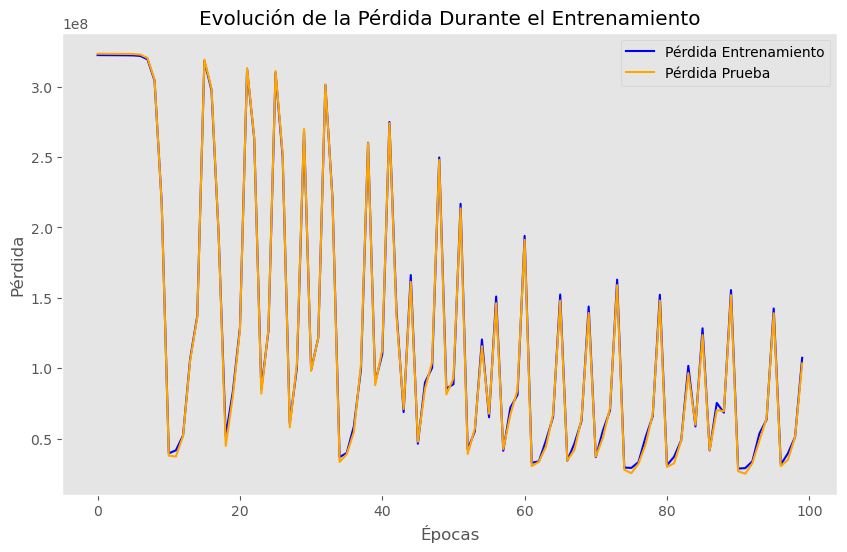

In [59]:
# Cargar el archivo CSV en un DataFrame
file_path = os.path.join(data_dir, "insurance.csv")
data = pd.read_csv(file_path)
print(data.head())

# Preprocesar las variables categóricas
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)

# Dividir en características (X) y objetivo (y)
X = data.drop(columns=["charges"])
y = data["charges"].values

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización de parámetros
n_input = X_train.shape[1]
n_hidden = 10
n_output = 1
np.random.seed(42)
W1 = np.random.randn(n_input, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))
learning_rate = 0.05

# Funciones de activación y pérdida
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def mse_loss_derivative(y_pred, y_true):
    return 2 * (y_pred - y_true) / y_true.size

# Propagación hacia adelante
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2}
    return y_pred, cache

# Propagación hacia atrás
def backward_pass(X, y_true, y_pred, cache):
    m = X.shape[0]
    dZ2 = mse_loss_derivative(y_pred, y_true.reshape(-1, 1))
    dW2 = np.dot(cache["A1"].T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Entrenamiento y registro de métricas
epochs = 100
loss_history_train = []
loss_history_test = []

for epoch in range(epochs):
    # Forward pass en conjunto de entrenamiento
    y_pred_train, cache_train = forward_pass(X_train)
    loss_train = mse_loss(y_pred_train, y_train.reshape(-1, 1))
    loss_history_train.append(loss_train)

    # Forward pass en conjunto de prueba
    y_pred_test, _ = forward_pass(X_test)
    loss_test = mse_loss(y_pred_test, y_test.reshape(-1, 1))
    loss_history_test.append(loss_test)
    
    # Backward pass y actualización de parámetros
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, y_pred_train, cache_train)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if epoch % 10 == 0:
        print(f"Época {epoch}: Pérdida entrenamiento: {loss_train:.4f}, Pérdida prueba: {loss_test:.4f}")

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history_train, label="Pérdida Entrenamiento", color="blue")
plt.plot(range(epochs), loss_history_test, label="Pérdida Prueba", color="orange")
plt.title("Evolución de la Pérdida Durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid()
plt.show()


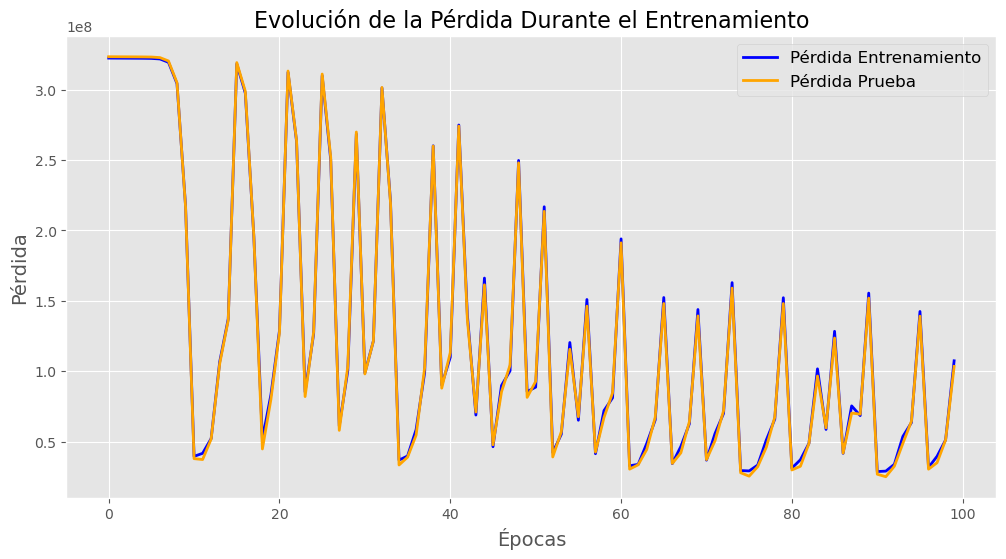

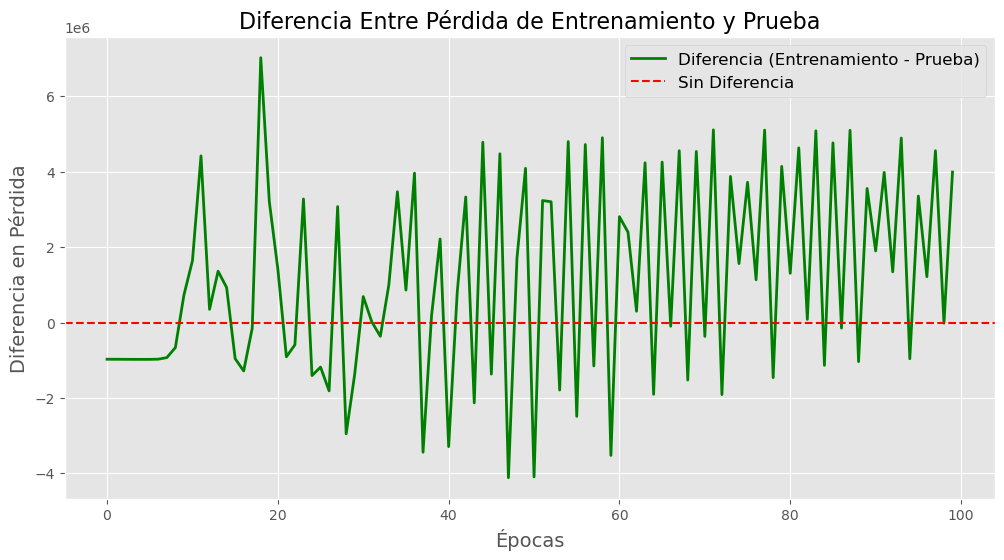

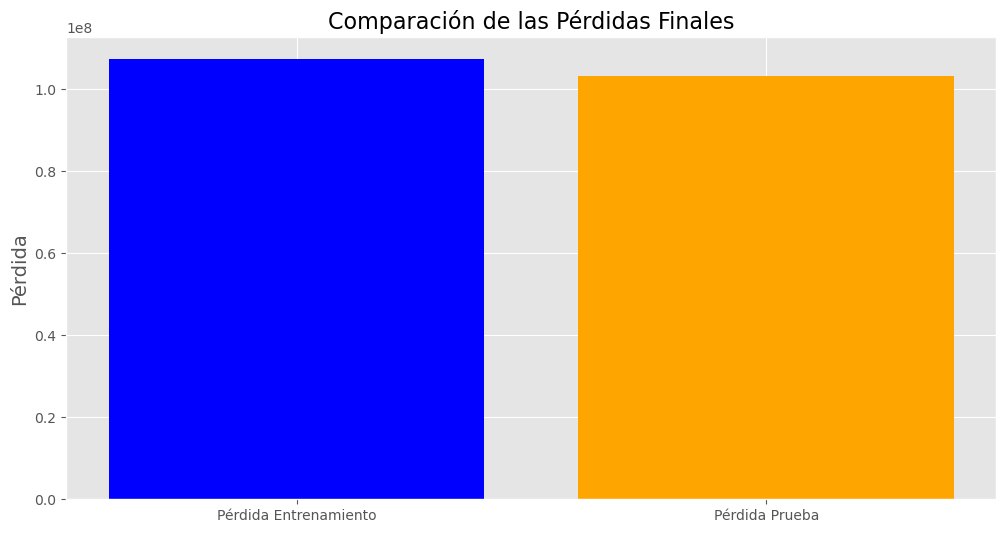

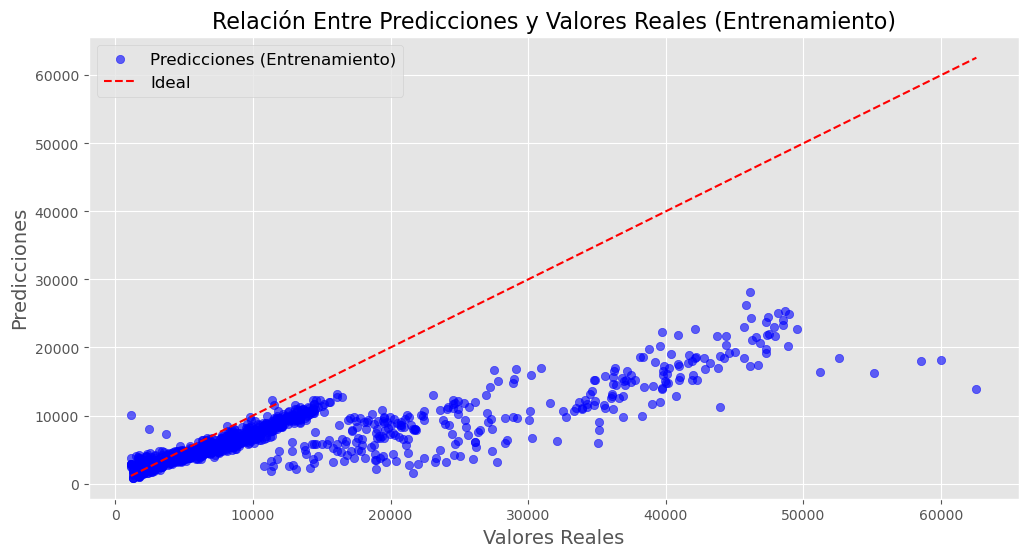

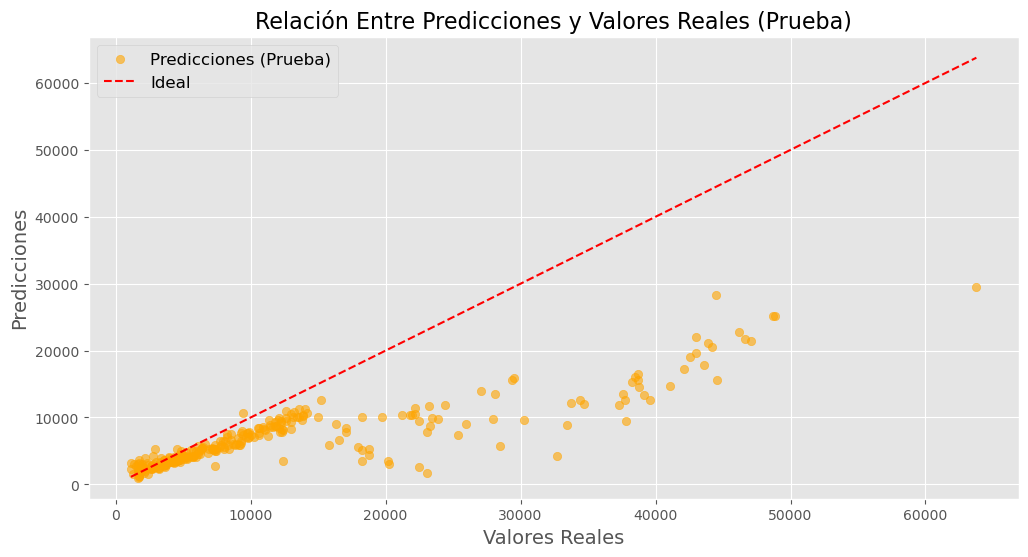

In [60]:
# Configuración para generar los gráficos
plt.style.use("ggplot")

# Gráfico 1: Evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), loss_history_train, label="Pérdida Entrenamiento", color="blue", linewidth=2)
plt.plot(range(epochs), loss_history_test, label="Pérdida Prueba", color="orange", linewidth=2)
plt.title("Evolución de la Pérdida Durante el Entrenamiento", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Gráfico 2: Diferencia entre pérdida de entrenamiento y prueba
loss_difference = np.array(loss_history_train) - np.array(loss_history_test)
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), loss_difference, label="Diferencia (Entrenamiento - Prueba)", color="green", linewidth=2)
plt.axhline(0, color="red", linestyle="--", label="Sin Diferencia")
plt.title("Diferencia Entre Pérdida de Entrenamiento y Prueba", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Diferencia en Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Gráfico 3: Distribución de pérdidas finales
plt.figure(figsize=(12, 6))
plt.bar(["Pérdida Entrenamiento", "Pérdida Prueba"], [loss_history_train[-1], loss_history_test[-1]], color=["blue", "orange"])
plt.title("Comparación de las Pérdidas Finales", fontsize=16)
plt.ylabel("Pérdida", fontsize=14)
plt.show()

# Gráfico 4: Relación entre predicciones y etiquetas reales (entrenamiento)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train.flatten(), alpha=0.6, color="blue", label="Predicciones (Entrenamiento)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Ideal")
plt.title("Relación Entre Predicciones y Valores Reales (Entrenamiento)", fontsize=16)
plt.xlabel("Valores Reales", fontsize=14)
plt.ylabel("Predicciones", fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Gráfico 5: Relación entre predicciones y etiquetas reales (prueba)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test.flatten(), alpha=0.6, color="orange", label="Predicciones (Prueba)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal")
plt.title("Relación Entre Predicciones y Valores Reales (Prueba)", fontsize=16)
plt.xlabel("Valores Reales", fontsize=14)
plt.ylabel("Predicciones", fontsize=14)
plt.legend(fontsize=12)
plt.show()


#### Ejemplo práctico con Keras

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Cargar el archivo CSV en un DataFrame
file_path = os.path.join(data_dir, "insurance.csv")
data = pd.read_csv(file_path)
print(data.head())


# Preprocesar las variables categóricas
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)

# Dividir en características (X) y objetivo (y)
X = data.drop(columns=["charges"])
y = data["charges"].values

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Salida de regresión
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Pérdida en prueba: {loss:.4f}, MAE en prueba: {mae:.4f}")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Epoch 1/100


/opt/miniconda3/envs/deep_learning/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 336888576.0000 - mae: 13725.0303 - val_loss: 322837664.0000 - val_mae: 12949.0488
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 349848928.0000 - mae: 13810.0713 - val_loss: 318748832.0000 - val_mae: 12834.0430
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 305624512.0000 - mae: 12959.5811 - val_loss: 303930368.0000 - val_mae: 12441.9463
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 309910080.0000 - mae: 12788.3184 - val_loss: 270711392.0000 - val_mae: 11559.1738
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 249072800.0000 - mae: 11394.0732 - val_loss: 217224832.0000 - val_mae: 10068.0371
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 200025984.0000 - mae: 9890.8633 - val_loss: 150778528.0000 - val_mae: 8112.5991
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 149846912.0000 - mae: 8296.8818 - val_loss: 91517560.0000 - val_mae: 6240.3809
Epoch 8/100
34/34 ━━━━━━━━━━━━

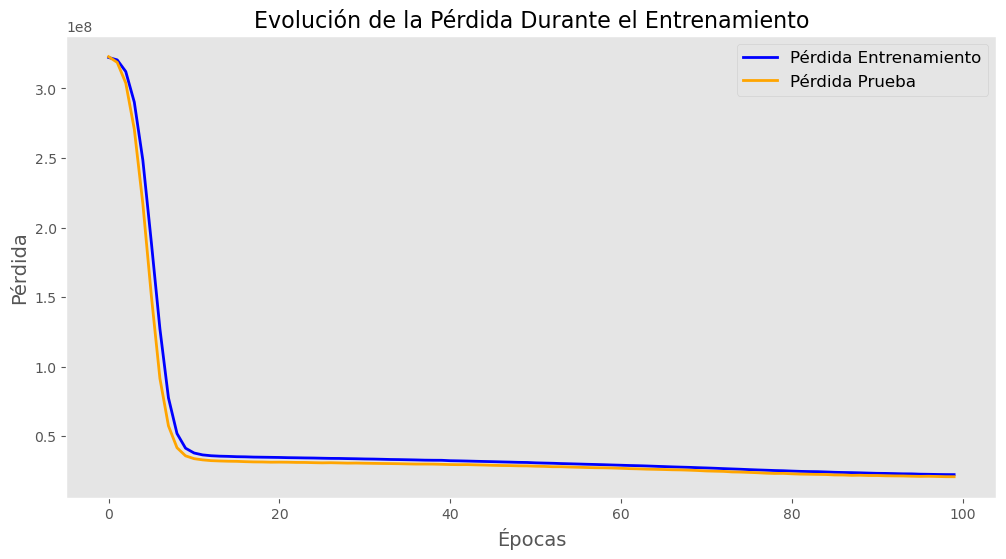

In [62]:
# Graficar pérdida (entrenamiento vs prueba)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida Prueba', color='orange', linewidth=2)
plt.title("Evolución de la Pérdida Durante el Entrenamiento", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


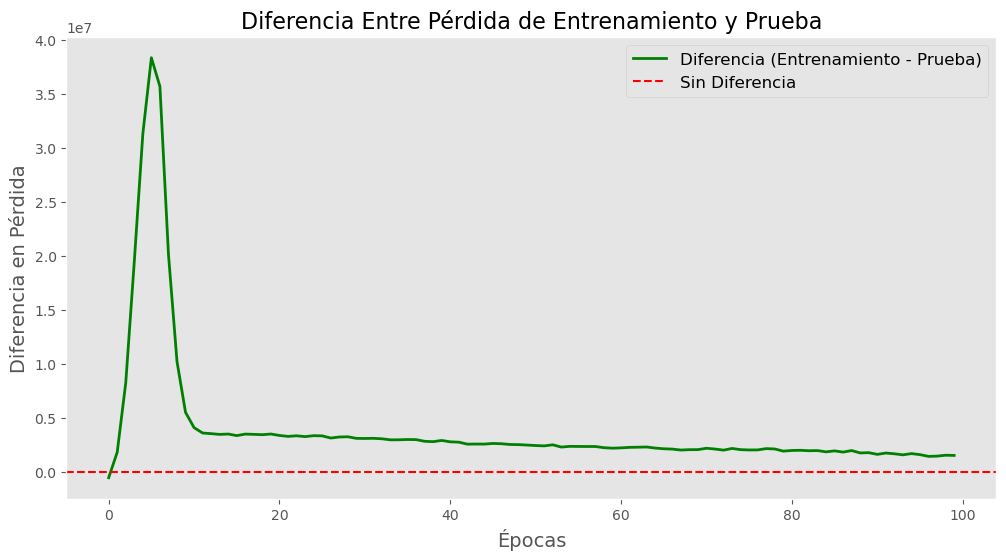

In [63]:
# Diferencia entre las pérdidas
loss_difference = np.array(history.history['loss']) - np.array(history.history['val_loss'])

plt.figure(figsize=(12, 6))
plt.plot(loss_difference, label="Diferencia (Entrenamiento - Prueba)", color="green", linewidth=2)
plt.axhline(0, color="red", linestyle="--", label="Sin Diferencia")
plt.title("Diferencia Entre Pérdida de Entrenamiento y Prueba", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Diferencia en Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


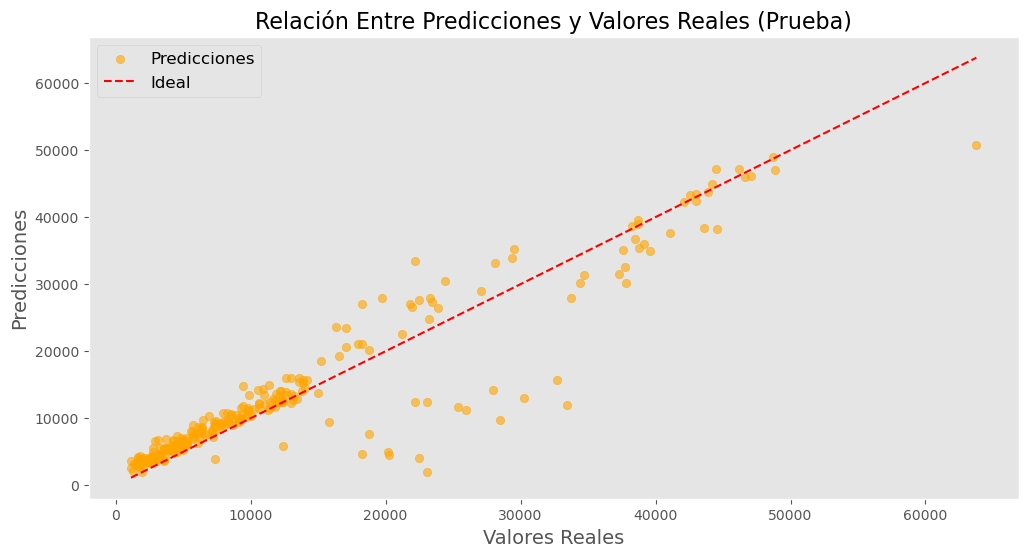

In [64]:
# Predicciones en prueba
y_pred_test = model.predict(X_test).flatten()

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color="orange", label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal")
plt.title("Relación Entre Predicciones y Valores Reales (Prueba)", fontsize=16)
plt.xlabel("Valores Reales", fontsize=14)
plt.ylabel("Predicciones", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [65]:
# Cambiar la función de pérdida de MSE a MAE
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mae'])

# Entrenar el modelo
history_mae = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Evaluar el modelo con MAE
loss_mae, mae_mae = model.evaluate(X_test, y_test)
print(f"Pérdida en prueba (MAE): {loss_mae:.4f}, MAE en prueba: {mae_mae:.4f}")


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2469.7344 - mae: 2469.7344 - val_loss: 2531.8984 - val_mae: 2531.8984
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2588.1313 - mae: 2588.1313 - val_loss: 2418.7654 - val_mae: 2418.7654
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2589.4749 - mae: 2589.4749 - val_loss: 2343.4685 - val_mae: 2343.4685
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2388.5164 - mae: 2388.5164 - val_loss: 2284.4875 - val_mae: 2284.4875
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2233.1584 - mae: 2233.1584 - val_loss: 2235.7903 - val_mae: 2235.7903
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2353.6458 - mae: 2353.6458 - val_loss: 2204.5171 - val_mae: 2204.5171
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2298.8499 - mae: 2298.8499 - val_loss: 2179.4558 - val_mae: 2179.4558
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2196.8921 - mae: 2196.8921 - val_loss:

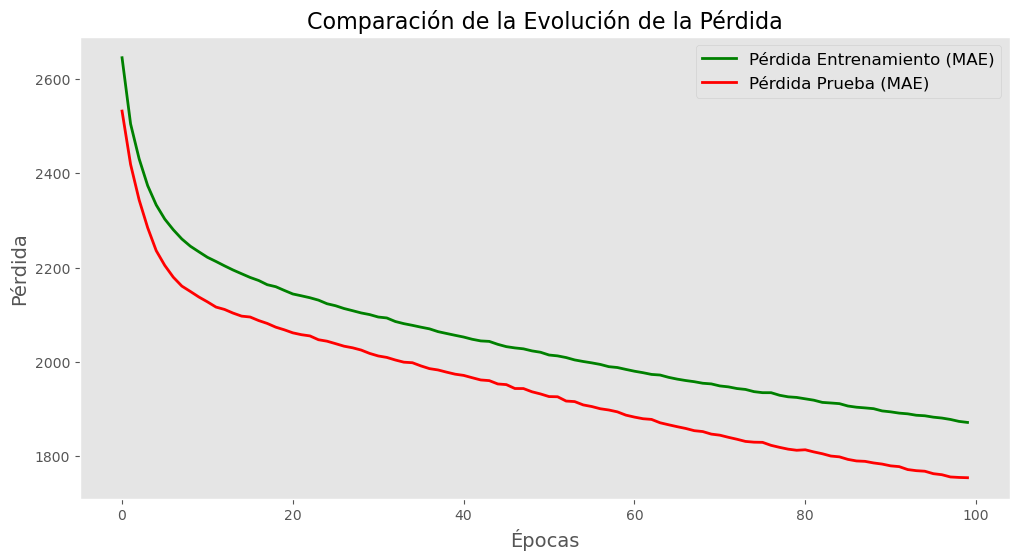

In [68]:
# Graficar pérdida para MSE y MAE
plt.figure(figsize=(12, 6))
plt.plot(history_mae.history['loss'], label='Pérdida Entrenamiento (MAE)', color='green', linewidth=2)
plt.plot(history_mae.history['val_loss'], label='Pérdida Prueba (MAE)', color='red', linewidth=2)
plt.title("Comparación de la Evolución de la Pérdida", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


## Optimización: Ajuste de Pesos en Redes Neuronales

Una vez calculados los gradientes mediante propagación hacia atrás, estos se utilizan para actualizar los pesos de la red neuronal mediante técnicas de optimización. Estas técnicas son fundamentales para garantizar que la red converge hacia un mínimo de la función de pérdida y, por ende, mejora en su tarea de predicción. A continuación, se explican las técnicas más comunes de optimización en aprendizaje profundo, con una descripción detallada y ejemplos gráficos.

### Descenso de Gradiente Estocástico (SGD)





El **descenso de gradiente estocástico** es una variante del descenso de gradiente donde se actualizan los pesos utilizando un solo ejemplo (o un pequeño lote de ejemplos) en lugar de calcular el gradiente sobre todo el conjunto de datos. Esto introduce aleatoriedad en las actualizaciones, lo que puede acelerar la convergencia.

Actualización matemática:

$ w := w - \eta \cdot \nabla \mathcal{L}(w) $

Donde:
- $ \eta $ es la tasa de aprendizaje.
- $ \nabla \mathcal{L}(w) $ es el gradiente de la pérdida respecto a los pesos.

**Ventajas:**
- Es más rápido que el descenso de gradiente clásico.
- Puede escapar de mínimos locales debido a su naturaleza ruidosa.

**Desventajas:**
- Las actualizaciones pueden ser inestables.
- Puede oscilar alrededor del mínimo.

**Ejemplo gráfico:**
En un gráfico de contorno de una función de pérdida, el SGD toma pasos pequeños y aleatorios hacia el mínimo global, a veces moviéndose lejos del mínimo debido a la aleatoriedad.


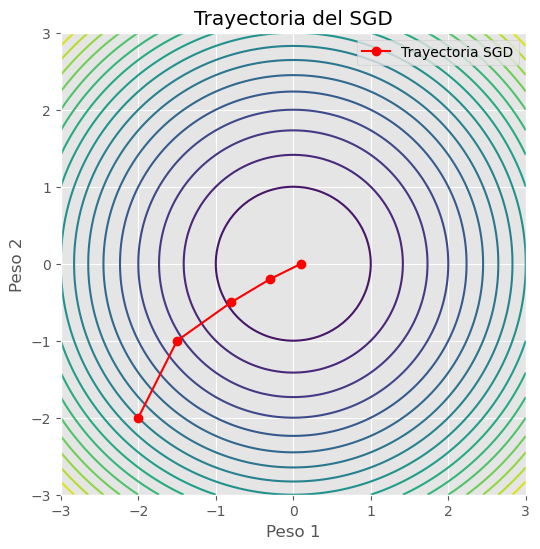

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(X, Y, Z, levels=20, cmap="viridis")
ax.plot([-2, -1.5, -0.8, -0.3, 0.1], [-2, -1, -0.5, -0.2, 0], marker="o", color="red", label="Trayectoria SGD")
ax.legend()
plt.title("Trayectoria del SGD")
plt.xlabel("Peso 1")
plt.ylabel("Peso 2")
plt.show()

### Descenso de Gradiente con Momento

El **descenso de gradiente con momento** es una técnica que mejora el descenso de gradiente estándar al incorporar un término de "momento" que acelera el proceso de convergencia en direcciones de gradientes consistentes y ayuda a evitar oscilaciones en direcciones con gradientes fluctuantes.

Fundamentos Matemáticos

1. **Cálculo del Momento**:
   - El momento acumula una fracción del gradiente anterior y lo combina con el gradiente actual.
   - Fórmula:
     $$
     v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot \nabla \mathcal{L}(w)
     $$

     Donde:
     - $v_t$: Velocidad acumulada en el paso $t$.
     - $\beta$: Coeficiente de momento (usualmente 0.9).
     - $\nabla \mathcal{L}(w)$: Gradiente de la pérdida con respecto a los pesos.

2. **Actualización de los Pesos**:
   - Los pesos se actualizan utilizando la velocidad acumulada:
     $$
     w_t = w_{t-1} - \eta \cdot v_t
     $$

     Donde:
     - $\eta$: Tasa de aprendizaje.
     - $w_t$: Pesos en el paso $t$.

Intuición del Momento

El momento permite que el modelo:
- **Acelere en direcciones constantes**: Si el gradiente apunta consistentemente en una dirección, el momento incrementa la magnitud de los pasos en esa dirección.
- **Reduzca oscilaciones**: Cuando el gradiente fluctúa, el momento amortigua los cambios bruscos, evitando oscilaciones alrededor del mínimo.

Implementación del Algoritmo

Paso 1: Inicialización
- Establecer $\beta$, $\eta$, y los valores iniciales para $v_t$ y $w$.

Paso 2: Iteraciones
- Para cada iteración $t$:
  1. Calcular el gradiente: $\nabla \mathcal{L}(w)$.
  2. Actualizar la velocidad: $v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot \nabla \mathcal{L}(w)$.
  3. Actualizar los pesos: $w_t = w_{t-1} - \eta \cdot v_t$.

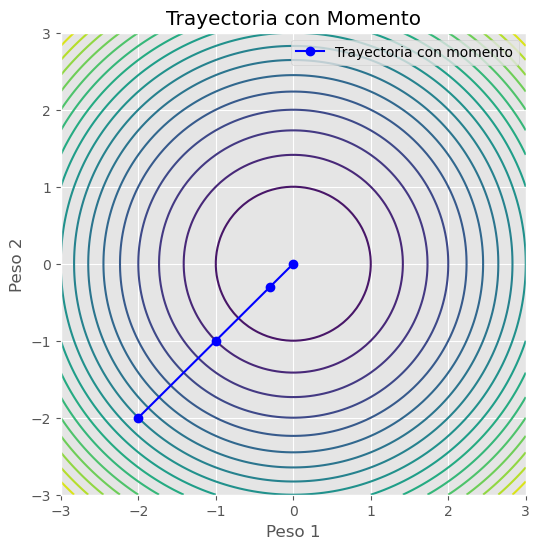

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(X, Y, Z, levels=20, cmap="viridis")
ax.plot([-2, -1, -0.3, 0], [-2, -1, -0.3, 0], marker="o", color="blue", label="Trayectoria con momento")
ax.legend()
plt.title("Trayectoria con Momento")
plt.xlabel("Peso 1")
plt.ylabel("Peso 2")
plt.show()


**Ventajas y Desventajas**

Ventajas:

* Convergencia más rápida: Reduce la cantidad de iteraciones necesarias para alcanzar el mínimo.
* Menos oscilaciones: Proporciona pasos más estables en valles profundos.

Desventajas:

* Requiere ajustar el parámetro $\beta$, lo que puede ser complicado.
* En problemas con gradientes fluctuantes, puede sobrecompensar.

**Aplicaciones Típicas**

El descenso de gradiente con momento es ampliamente utilizado en:

* Redes neuronales profundas.
* Optimización en problemas no convexos.
* Modelos con gradientes ruidosos o fluctuantes

### Adam (Adaptive Moment Estimation)

El **algoritmo Adam (Adaptive Moment Estimation)** es un método de optimización que combina las ventajas del descenso de gradiente con momento y RMSProp. Adam ajusta dinámicamente la tasa de aprendizaje para cada parámetro en función del historial de gradientes y de sus magnitudes, logrando una convergencia eficiente y robusta.

Fundamentos Matemáticos

Adam utiliza dos componentes clave:
1. **Media móvil de los gradientes (momento)**:
   - Calcula una media móvil exponencial de los gradientes:
     $$
     m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot \nabla \mathcal{L}(w)
     $$

     Donde:
     - $m_t$: Momento (media móvil de los gradientes).
     - $\beta_1$: Coeficiente de decaimiento para el momento.

2. **Media móvil de los gradientes al cuadrado**:
   - Calcula una media móvil exponencial de los gradientes al cuadrado:
     $$
     v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot (\nabla \mathcal{L}(w))^2
     $$

     Donde:
     - $v_t$: Media móvil de los gradientes al cuadrado.
     - $\beta_2$: Coeficiente de decaimiento para la magnitud de los gradientes.

3. **Corrección del sesgo**:
   - Al inicio, $m_t$ y $v_t$ están sesgados hacia cero. Para corregir esto:
     $$
     \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
     $$

4. **Actualización de los pesos**:
   - Los pesos se actualizan utilizando las estimaciones corregidas:
     $$
     w_t = w_{t-1} - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
     $$

     Donde:
     - $\eta$: Tasa de aprendizaje.
     - $\epsilon$: Valor pequeño para evitar divisiones por cero (usualmente $10^{-8}$).

---

Intuición de Adam

1. **Adaptación Dinámica**:
   - Los pasos de actualización son más grandes en direcciones con gradientes pequeños y más pequeños en direcciones con gradientes grandes, lo que mejora la estabilidad.

2. **Corrección de Sesgo Inicial**:
   - Las estimaciones iniciales de los gradientes y sus magnitudes no dominan la actualización gracias a la corrección de sesgo.

---

Implementación del Algoritmo

Paso 1: Inicialización
- Inicializar $m_0 = 0$, $v_0 = 0$ y los pesos iniciales $w$.

Paso 2: Iteraciones
- Para cada iteración $t$:
  1. Calcular el gradiente: $\nabla \mathcal{L}(w)$.
  2. Actualizar $m_t$ y $v_t$ usando las fórmulas anteriores.
  3. Calcular las estimaciones corregidas: $\hat{m}_t$ y $\hat{v}_t$.
  4. Actualizar los pesos: $w_t = w_{t-1} - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$.

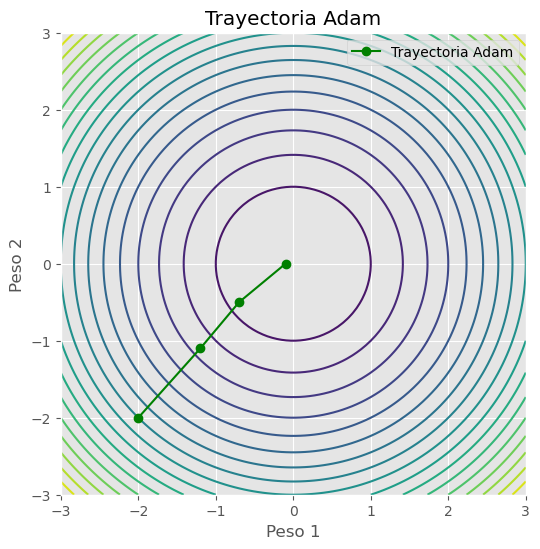

In [70]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(X, Y, Z, levels=20, cmap="viridis")
ax.plot([-2, -1.2, -0.7, -0.1], [-2, -1.1, -0.5, 0], marker="o", color="green", label="Trayectoria Adam")
ax.legend()
plt.title("Trayectoria Adam")
plt.xlabel("Peso 1")
plt.ylabel("Peso 2")
plt.show()
